In [1]:
from torchvision import datasets, transforms, models
import torch.utils.data as data

import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
import torch
from tqdm.notebook import trange, tqdm
import numpy as np
import random


In [2]:
# Define any transformations you want (similar to how you use in CIFAR10)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 32x32 like CIFAR if necessary
    transforms.ToTensor(),        # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize based on your dataset
])

dataset = datasets.ImageFolder(root=r'..\Dataset\Train', transform=transform)

# Calculate the lengths for training and testing splits (80% - 20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset
train_dataset, test_dataset =  data.random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing datasets
trainloader =  data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
testloader =  data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Load pre-trained ResNet-18 model
resnet = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes in your dataset
num_classes = len(dataset.classes)  # Get the number of classes
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)


c:\Users\david\Desktop\Code\DNN\DNNvenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\david\Desktop\Code\DNN\DNNvenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# Load pre-trained ResNet-18 model
resnet = models.resnet18(pretrained=True)

# Freeze all layers
for param in resnet.parameters():
    param.requires_grad = False

# Modify the fully connected layer for the correct number of classes
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# # Enable training for the fully connected layer
# for param in resnet.fc.parameters():
#     param.requires_grad = True

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet = resnet.to(device)

# Define the loss function and optimizer
resnet.eval()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)



In [4]:
def count_parameters(NN):
    return sum([p.numel() for p in NN.parameters() if p.requires_grad==True])

print(f"trainable parameters: {count_parameters(resnet)}")

trainable parameters: 6156


Train+plot

Epoch 1/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 1, Batch 100] loss: 1.254
Accuracy after epoch 1: 85.35%


Epoch 2/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 2, Batch 100] loss: 0.429
Accuracy after epoch 2: 90.99%


Epoch 3/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 3, Batch 100] loss: 0.310
Accuracy after epoch 3: 91.88%


Epoch 4/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 4, Batch 100] loss: 0.244
Accuracy after epoch 4: 92.74%


Epoch 5/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 5, Batch 100] loss: 0.212
Accuracy after epoch 5: 92.31%


Epoch 6/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 6, Batch 100] loss: 0.188
Accuracy after epoch 6: 94.57%


Epoch 7/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 7, Batch 100] loss: 0.172
Accuracy after epoch 7: 94.53%


Epoch 8/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 8, Batch 100] loss: 0.158
Accuracy after epoch 8: 93.84%


Epoch 9/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 9, Batch 100] loss: 0.142
Accuracy after epoch 9: 94.93%


Epoch 10/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 10, Batch 100] loss: 0.135
Accuracy after epoch 10: 94.47%


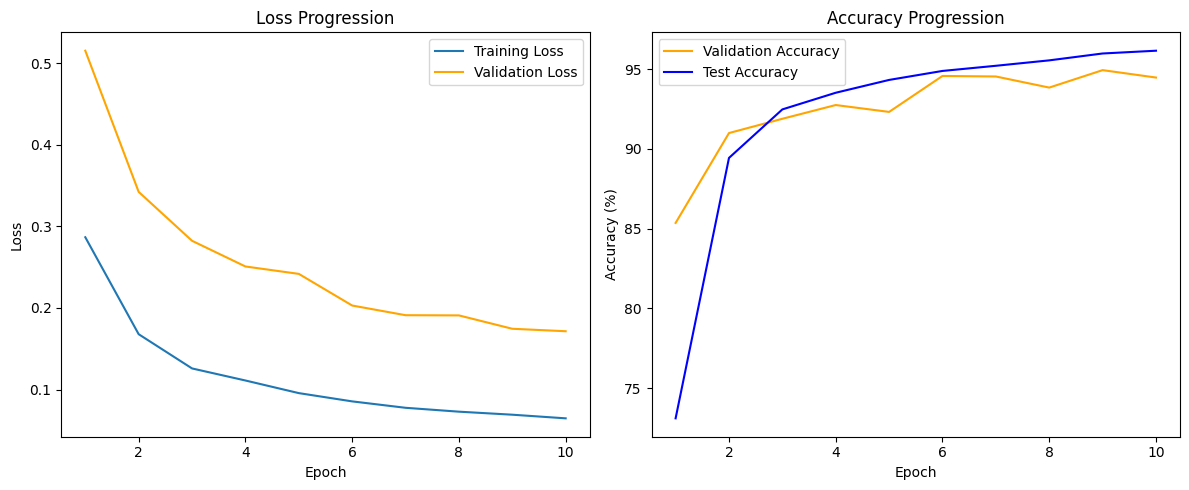

Epoch 11/100:   0%|          | 0/189 [00:00<?, ?batch/s]

[Epoch 11, Batch 100] loss: 0.130


KeyboardInterrupt: 

In [7]:
# Define the number of epochs
num_epochs = 100

# Lists to store loss and accuracy
train_losses = []
val_losses = []  
val_accuracies = []
acc_history = []
resnet.train()  # Set the model to training mode
# Training loop
for epoch in range(num_epochs):
    correct = 0
    total = 0
    running_loss = 0.0
    progress_bar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")
    
    # Mini-batch training
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate the running loss
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)  # Get the predicted class (index of max log-probability)
        total += labels.size(0)  # Total number of labels in this mini-batch
        correct += (predicted == labels).sum().item()  # Compare predictions to true labels and count correct ones

        # Print loss every 100 mini-batches
        if i % 100 == 99:  
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    epoch_accuracy = 100 * correct / total  # Compute accuracy percentage
    acc_history.append(epoch_accuracy)
    # After each epoch, save the average training loss
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    # Validation accuracy check
    resnet.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    val_running_loss = 0.0 
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_running_loss / len(testloader)
    val_losses.append(avg_val_loss)
    # Calculate and store validation accuracy
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f"Accuracy after epoch {epoch + 1}: {val_accuracy:.2f}%")
    if (epoch+1) % 10 == 0:
        plotGraphs(epoch)


print('Finished Training')



In [6]:
def plotGraphs(num_epochsIn):
    epochs = range(1, num_epochsIn + 2)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss', color='orange')
    plt.title('Loss Progression')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange')
    plt.plot(epochs, acc_history, label='Test Accuracy', color='blue')
    plt.title('Accuracy Progression')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

googlenet.eval()  

all_preds = []
all_labels = []

with torch.no_grad():  
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = googlenet(inputs)
        _, predicted = torch.max(outputs, 1)  
        
        all_preds.extend(predicted.cpu().numpy())  
        all_labels.extend(labels.cpu().numpy())  

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix on Training Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

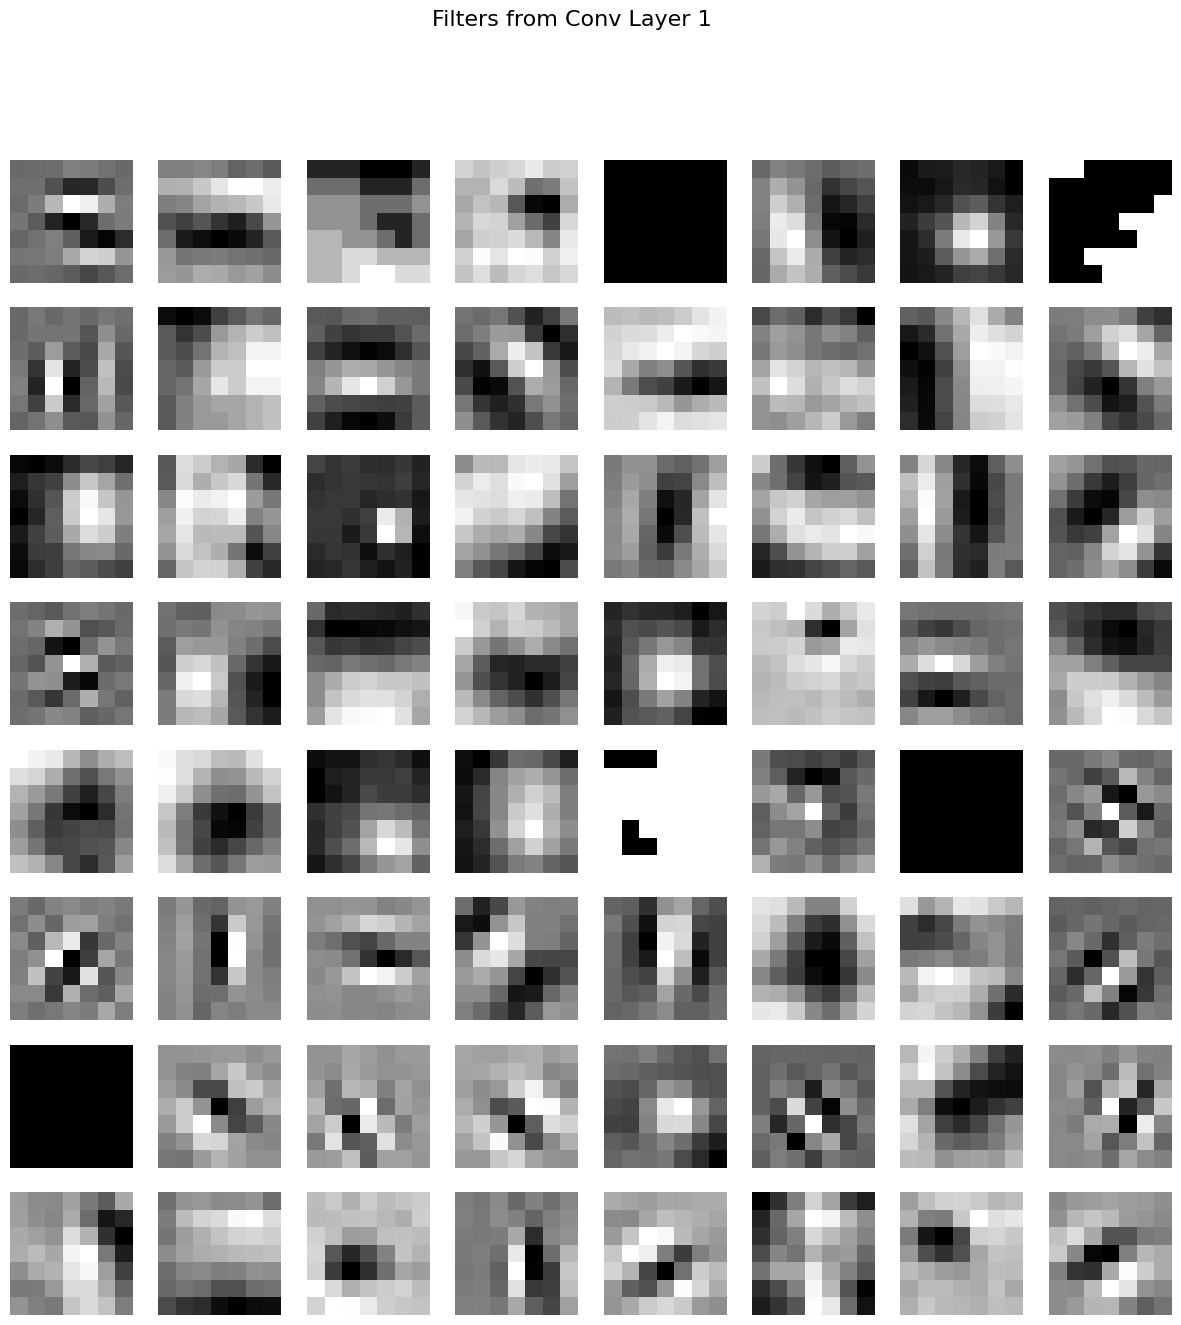

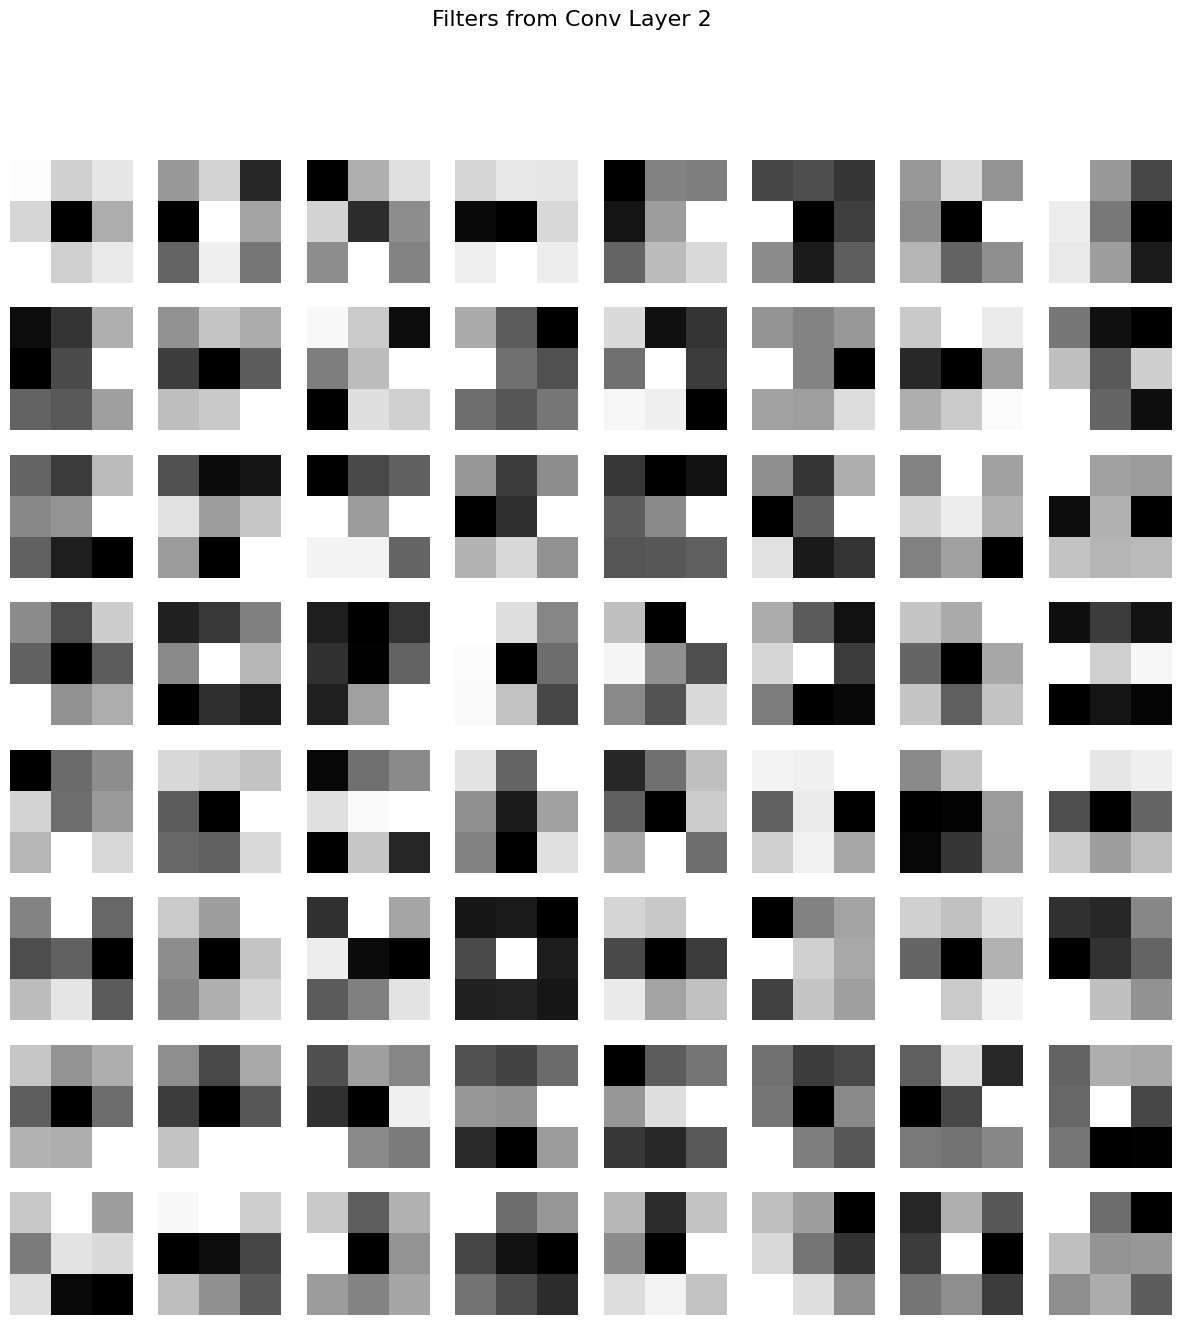

In [15]:
import math
def visualize_filters(model):
    conv_layer_count = 0  
    
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            conv_layer_count += 1

            if conv_layer_count == 1:
                filters = module.weight.data.cpu()
                filters = (filters - filters.min()) / (filters.max() - filters.min())  

                num_filters = filters.shape[0]
                num_cols = 8  
                num_rows = math.ceil(num_filters / num_cols)

                fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

                for i in range(num_filters):
                    row = i // num_cols
                    col = i % num_cols
                    axs[row, col].imshow(filters[i, 0, :, :], cmap='gray')
                    axs[row, col].axis('off')

                for j in range(i + 1, num_rows * num_cols):
                    fig.delaxes(axs[j // num_cols, j % num_cols])

                plt.suptitle("Filters from Conv Layer 1", fontsize=16)
                plt.show()

            if conv_layer_count == 2:
                filters = module.weight.data.cpu()
                filters = (filters - filters.min()) / (filters.max() - filters.min())  

                num_filters = filters.shape[0]
                num_cols = 8  
                num_rows = math.ceil(num_filters / num_cols)

                fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

                for i in range(num_filters):
                    row = i // num_cols
                    col = i % num_cols
                    axs[row, col].imshow(filters[i, 0, :, :], cmap='gray')
                    axs[row, col].axis('off')

                for j in range(i + 1, num_rows * num_cols):
                    fig.delaxes(axs[j // num_cols, j % num_cols])

                plt.suptitle("Filters from Conv Layer 2", fontsize=16)
                plt.show()
                break  
 

visualize_filters(resnet)

Feature maps for layer: conv1


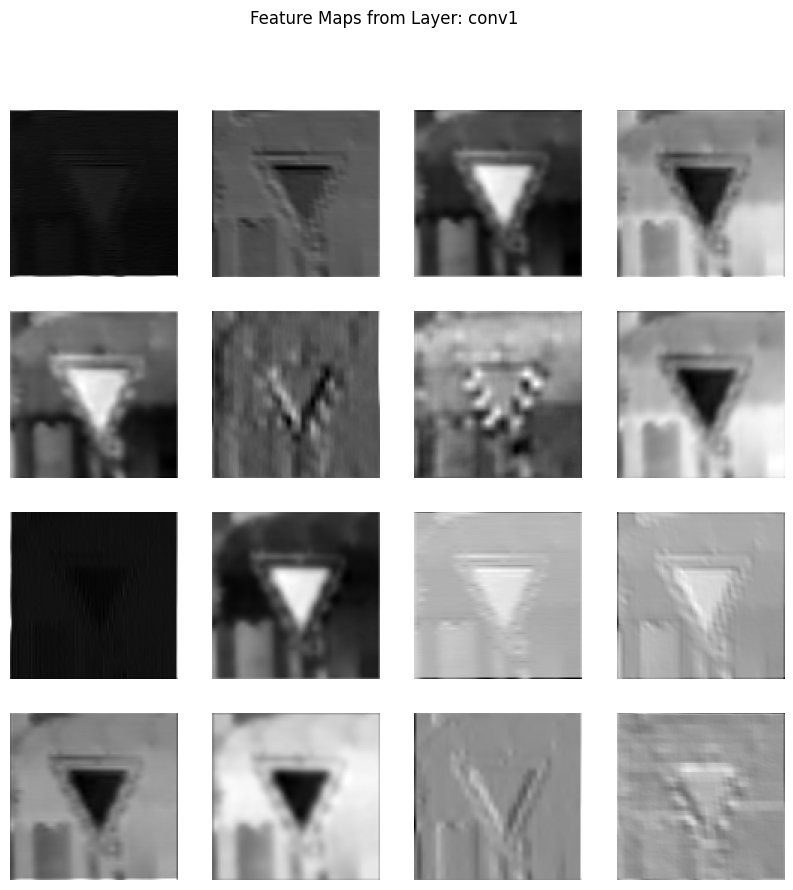

Feature maps for layer: layer1.0.conv1


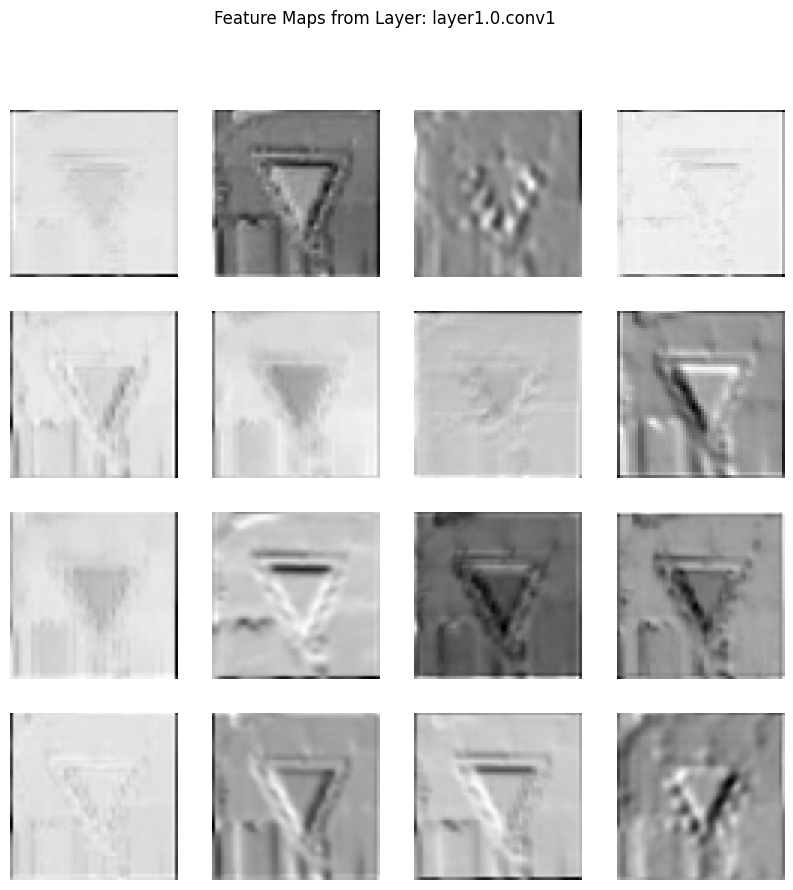

Feature maps for layer: layer1.0.conv2


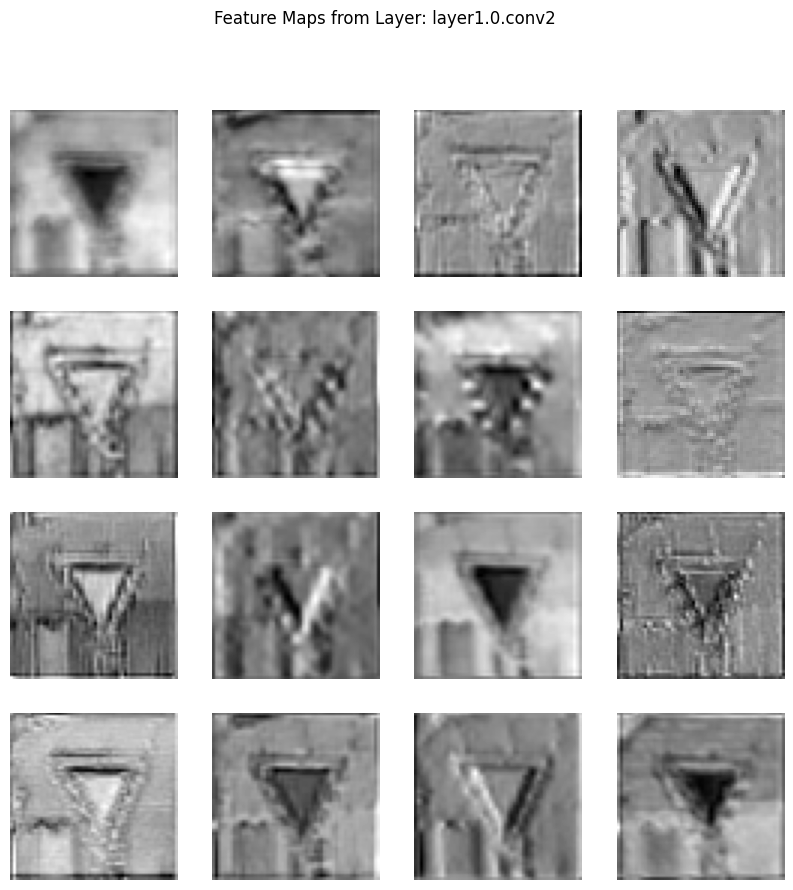

Feature maps for layer: layer1.1.conv1


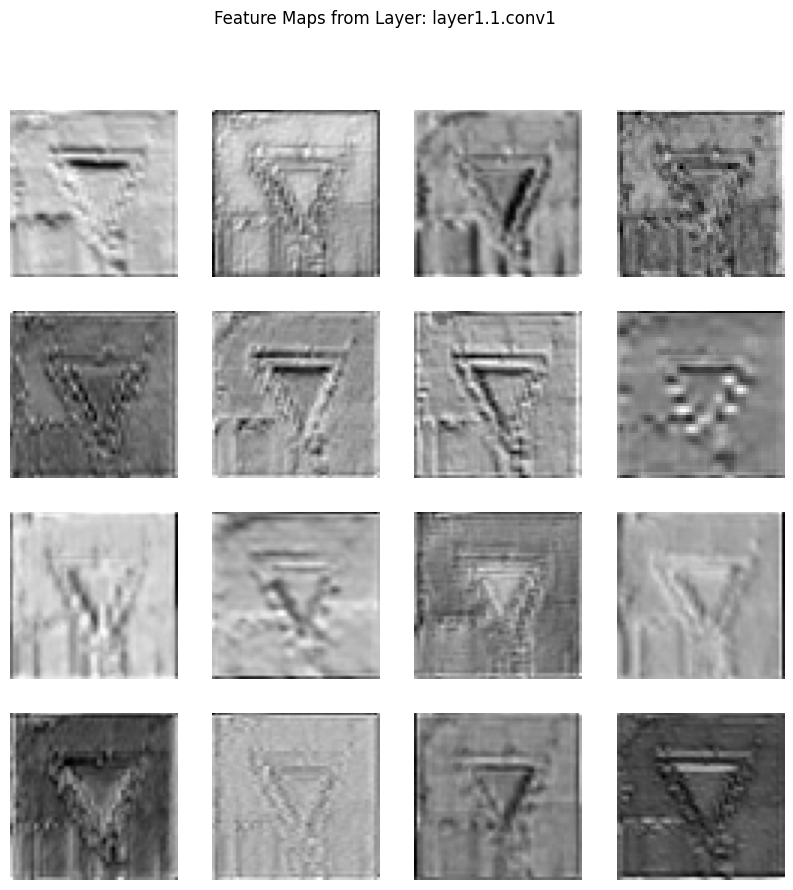

Feature maps for layer: layer1.1.conv2


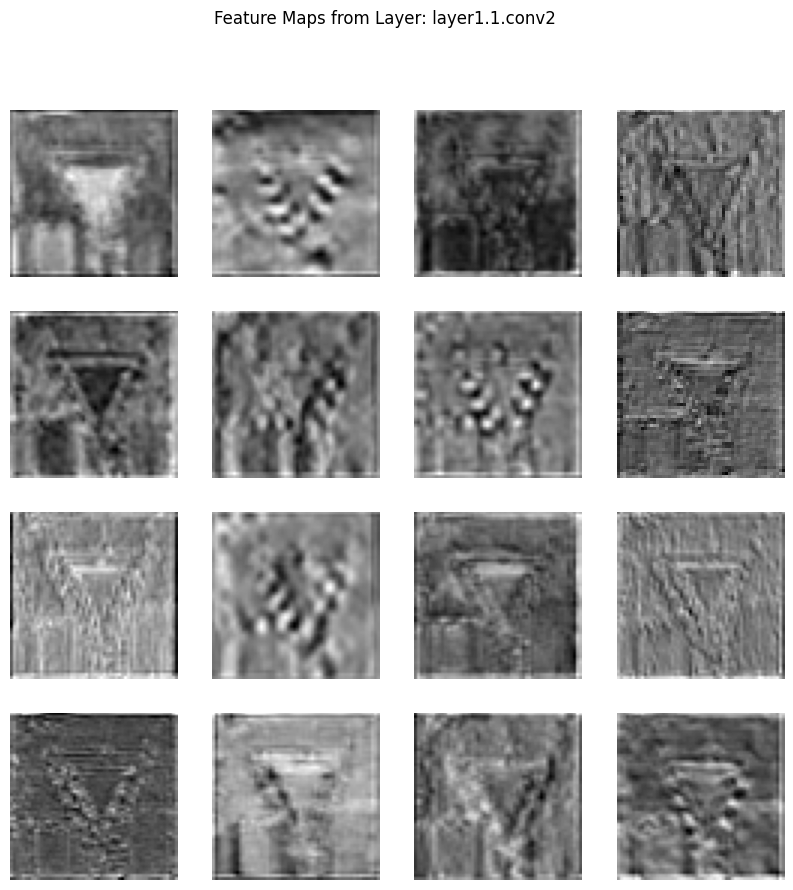

Feature maps for layer: layer2.0.conv1


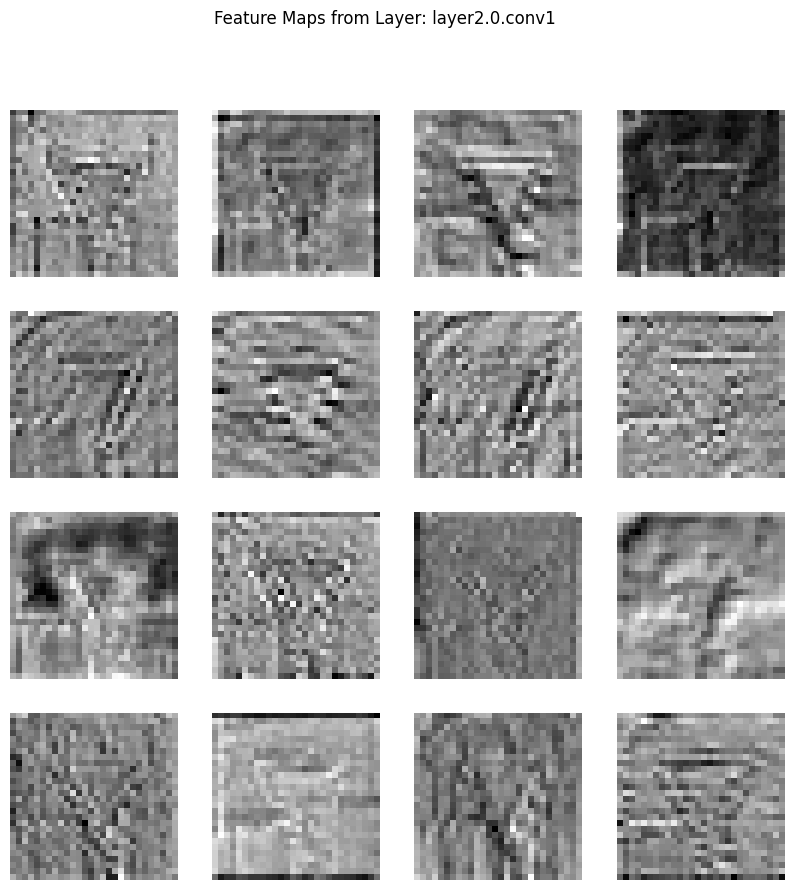

Feature maps for layer: layer2.0.conv2


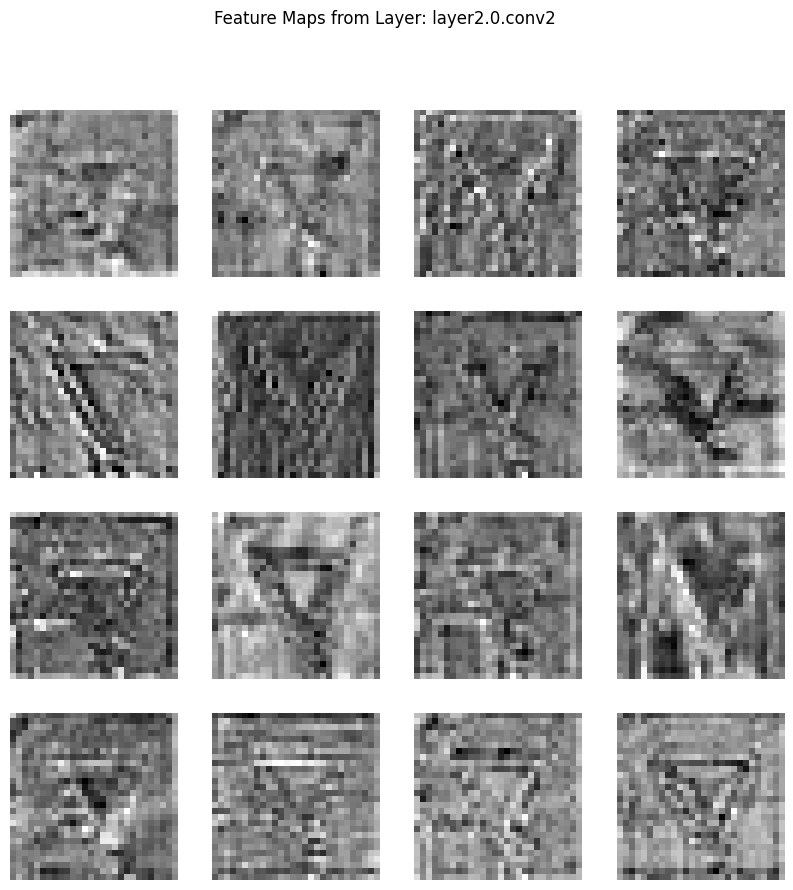

Feature maps for layer: layer2.0.downsample.0


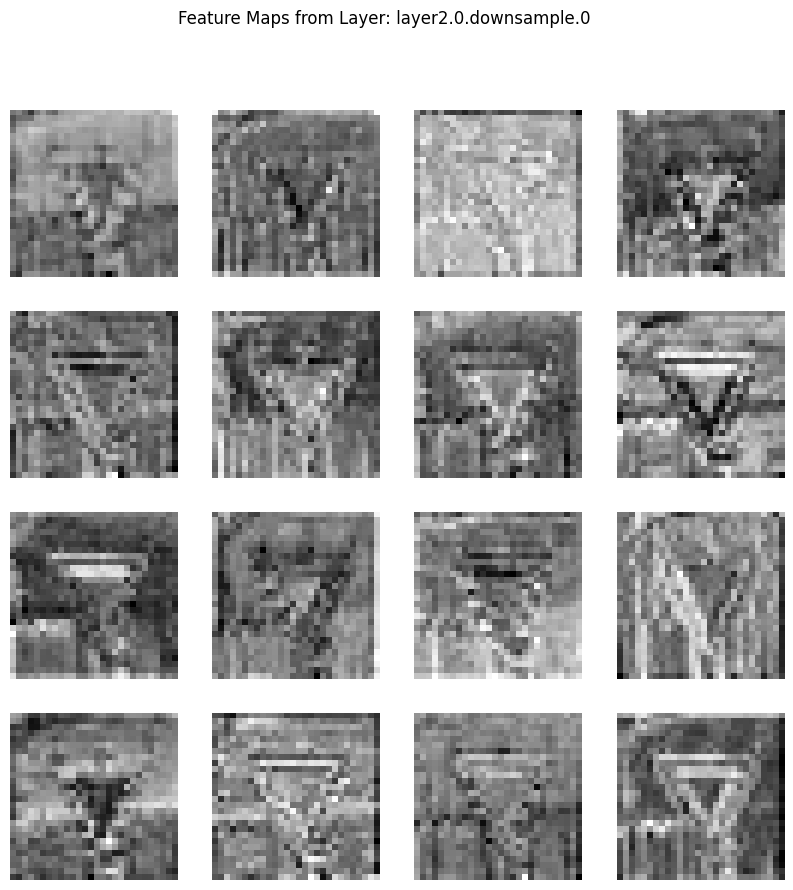

Feature maps for layer: layer2.1.conv1


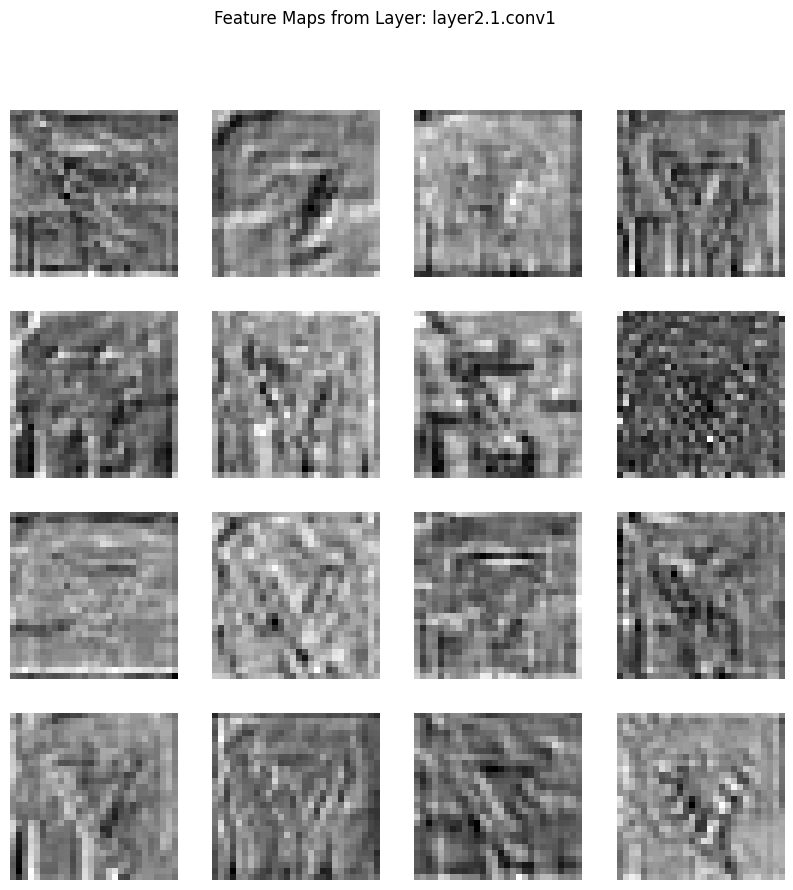

Feature maps for layer: layer2.1.conv2


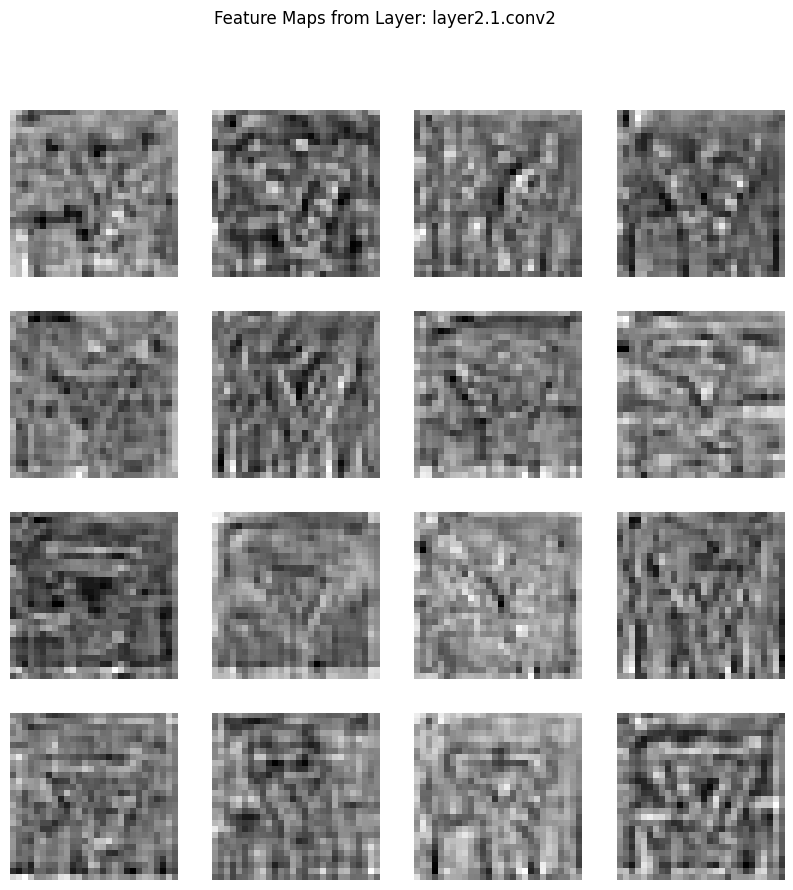

Feature maps for layer: layer3.0.conv1


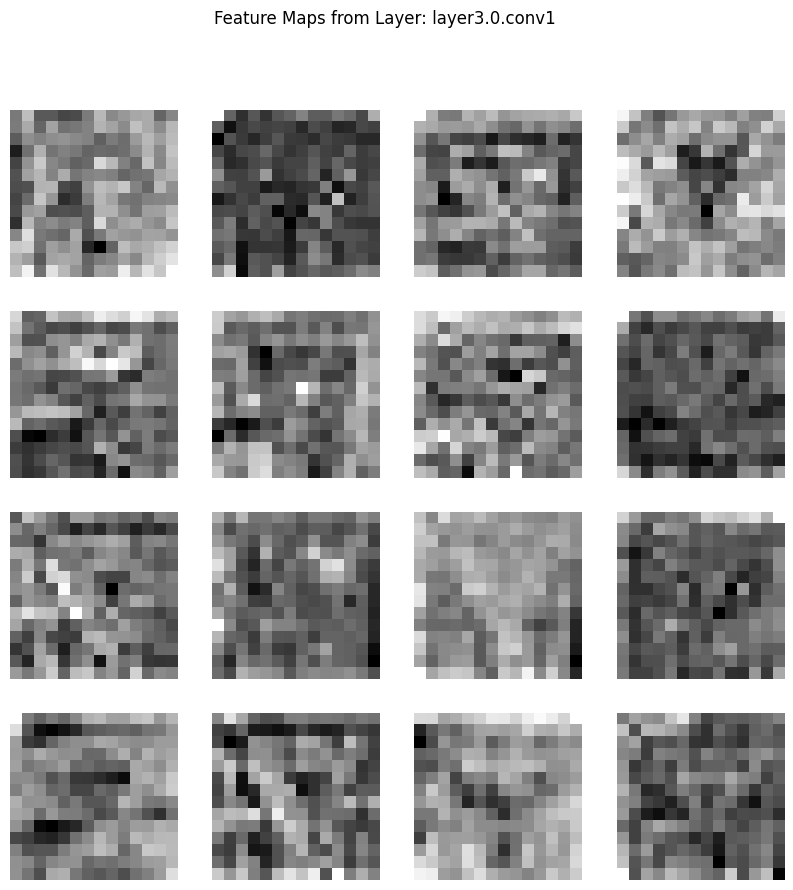

Feature maps for layer: layer3.0.conv2


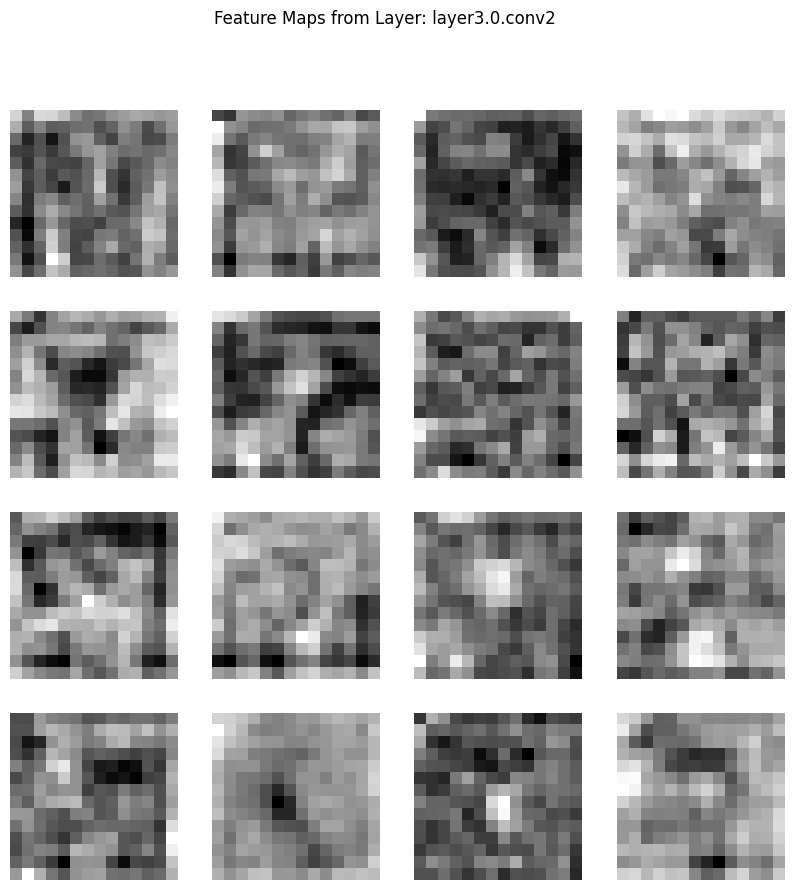

Feature maps for layer: layer3.0.downsample.0


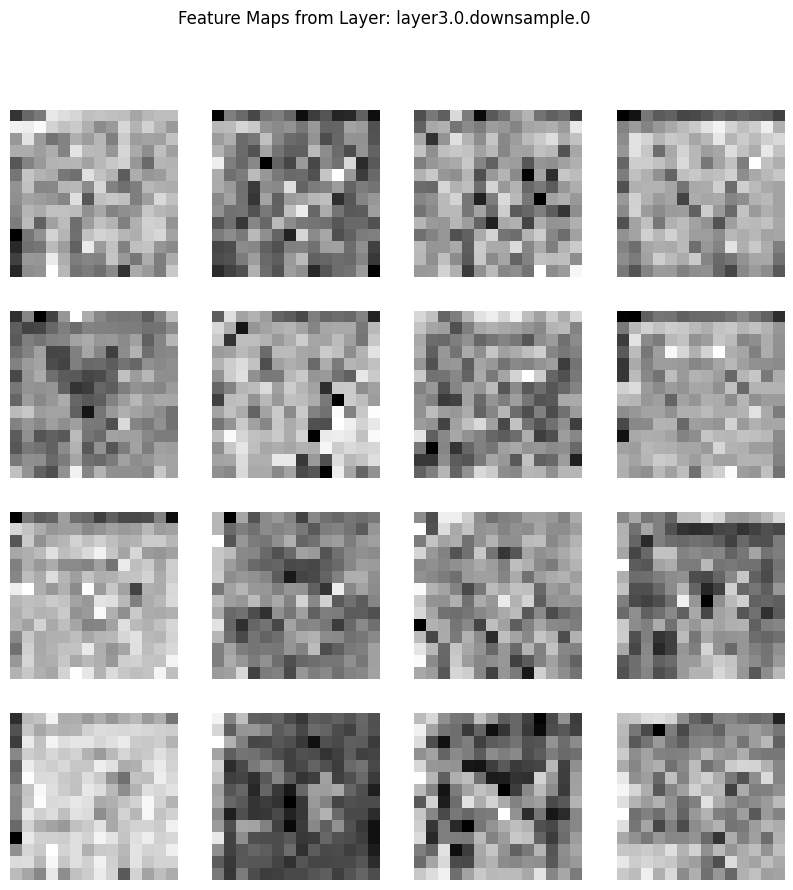

Feature maps for layer: layer3.1.conv1


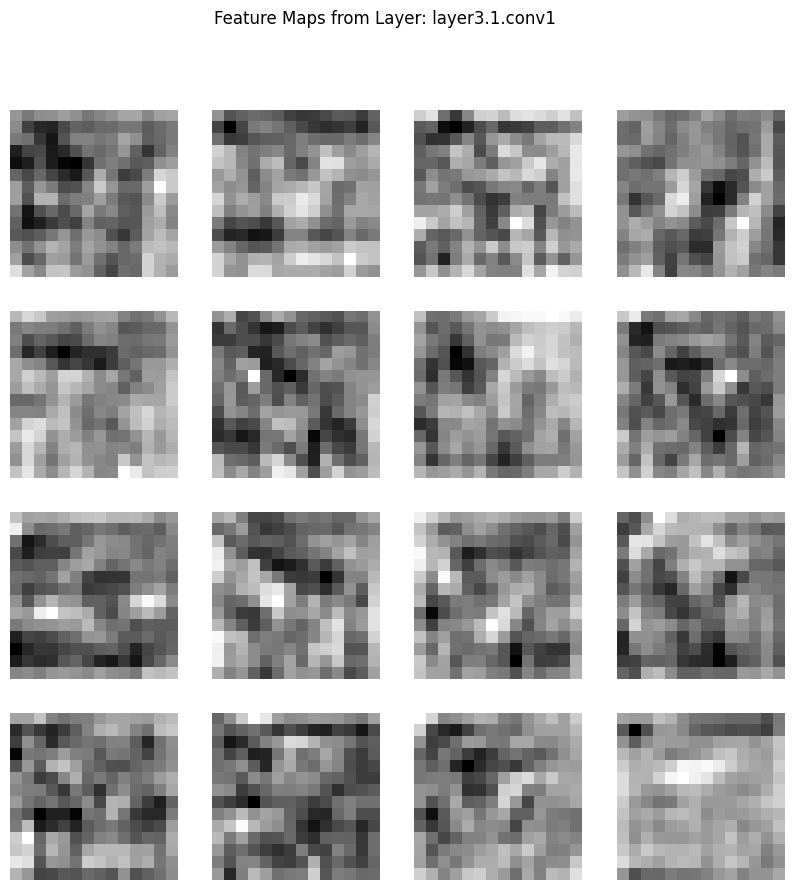

Feature maps for layer: layer3.1.conv2


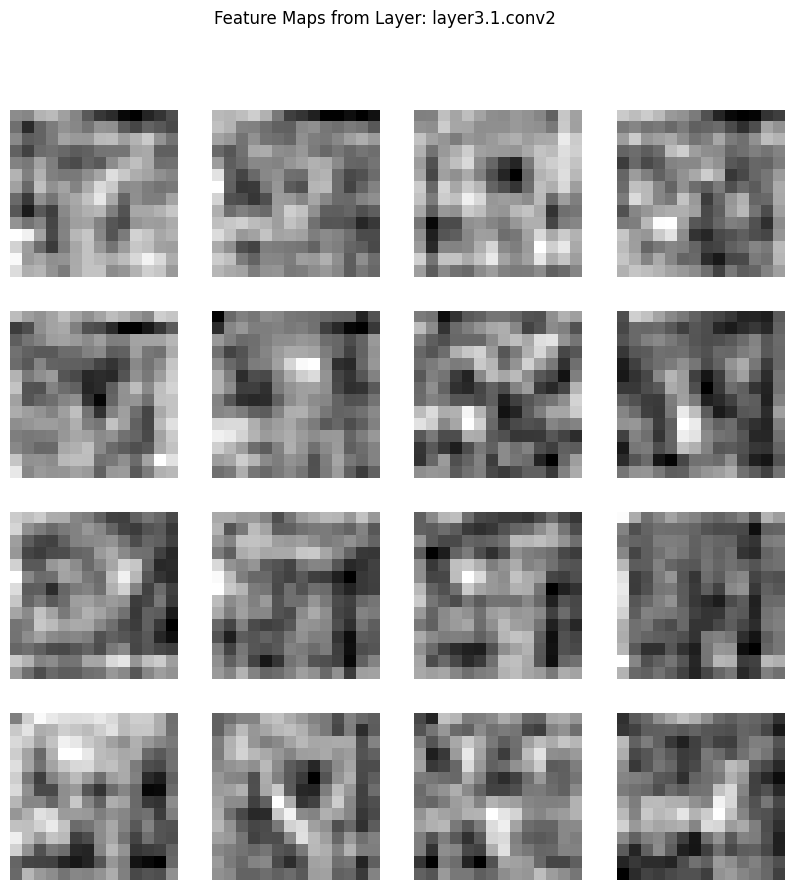

Feature maps for layer: layer4.0.conv1


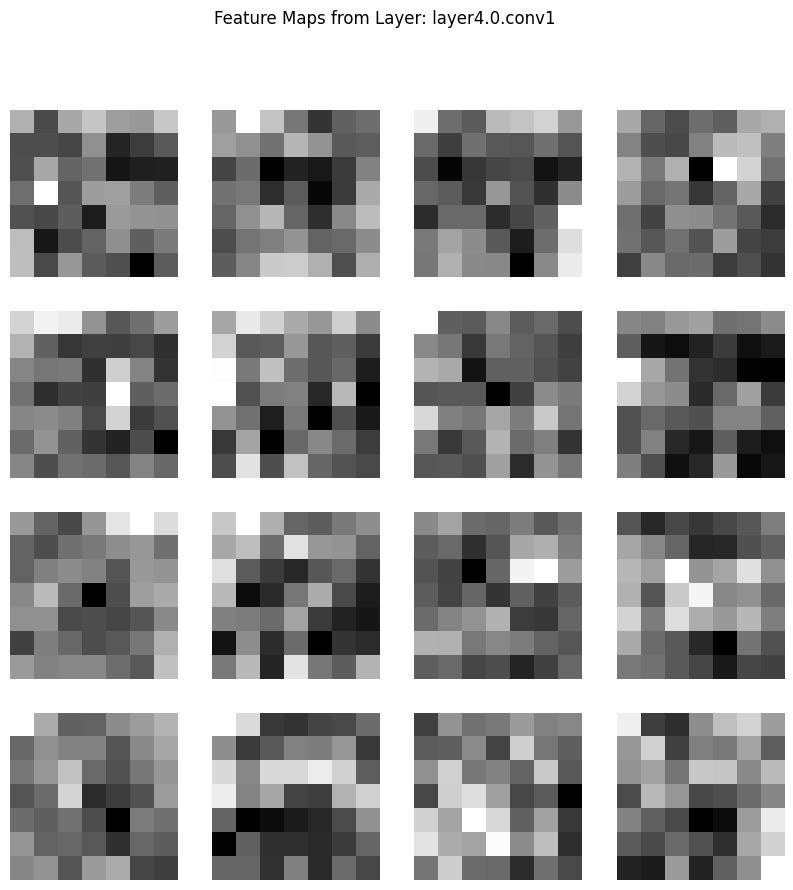

Feature maps for layer: layer4.0.conv2


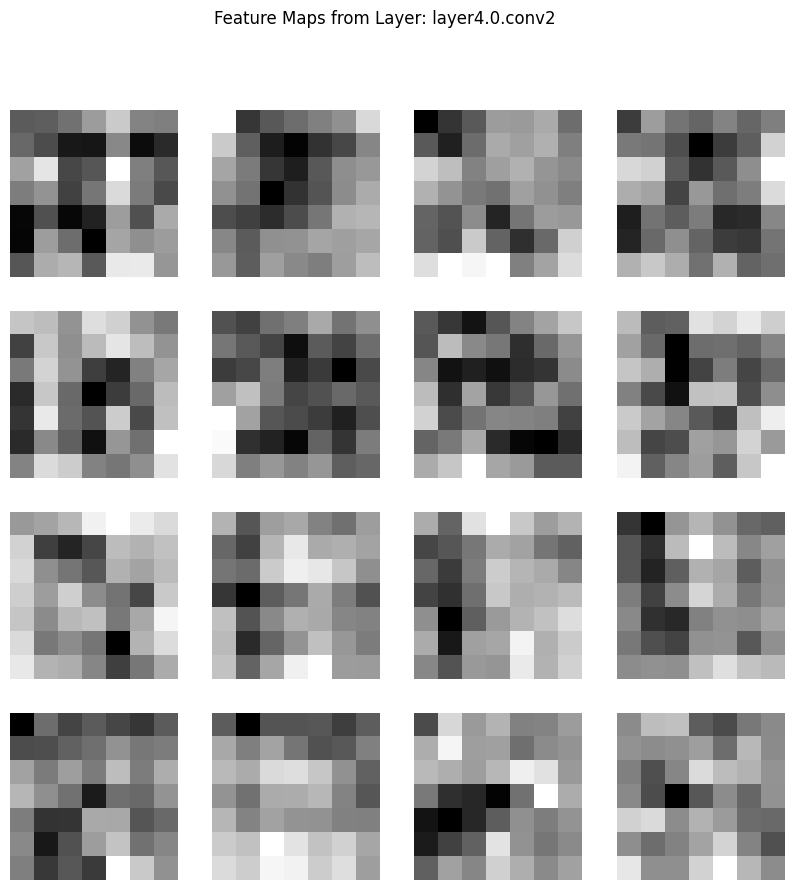

Feature maps for layer: layer4.0.downsample.0


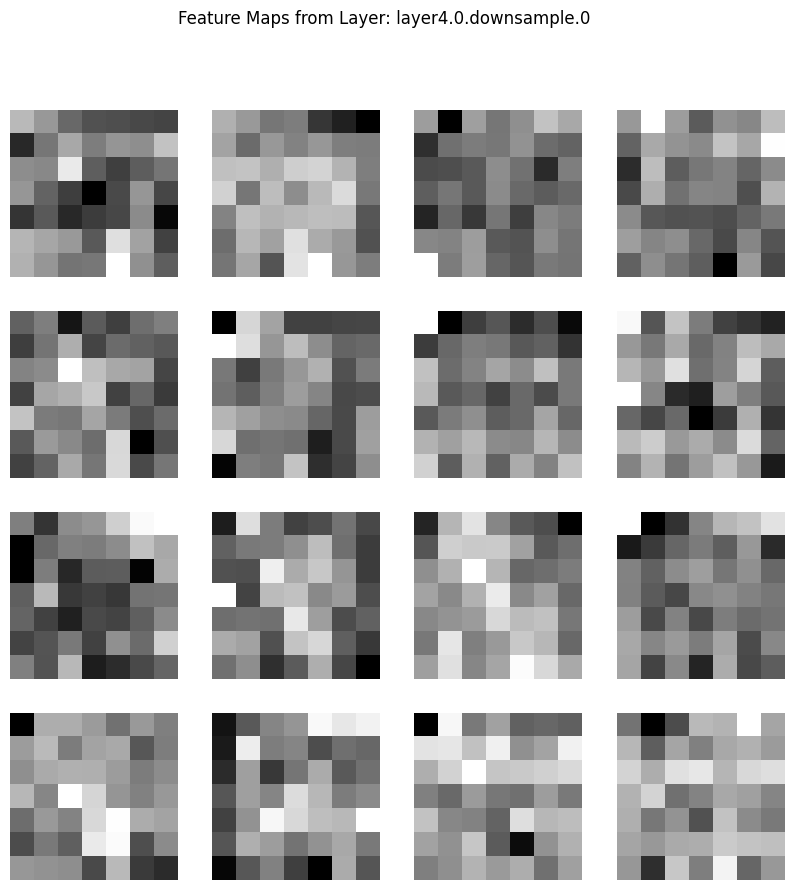

Feature maps for layer: layer4.1.conv1


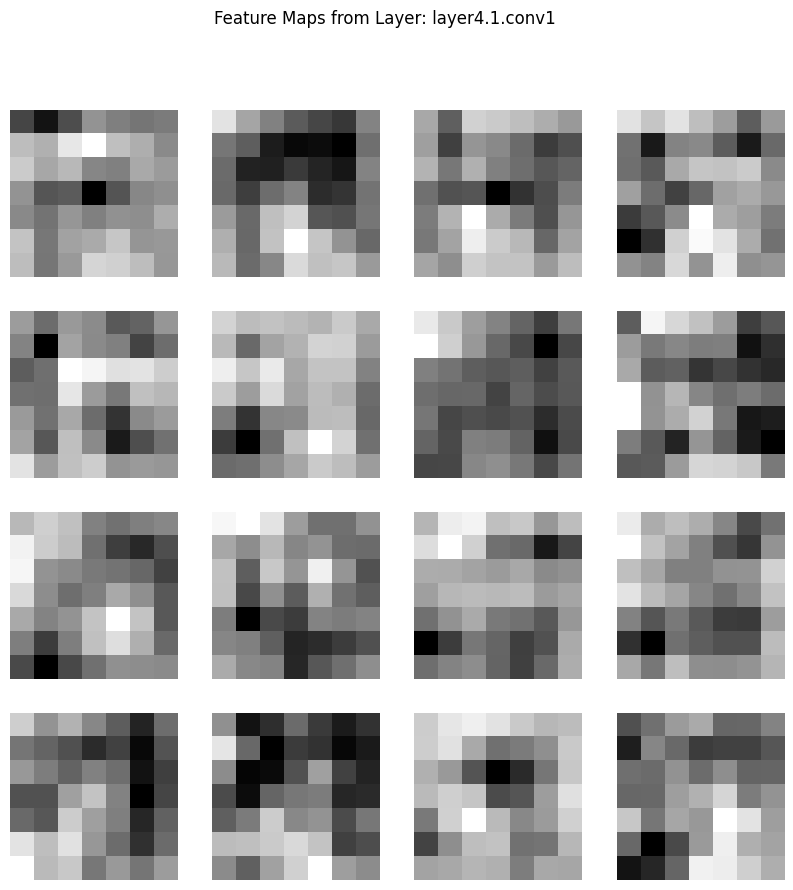

Feature maps for layer: layer4.1.conv2


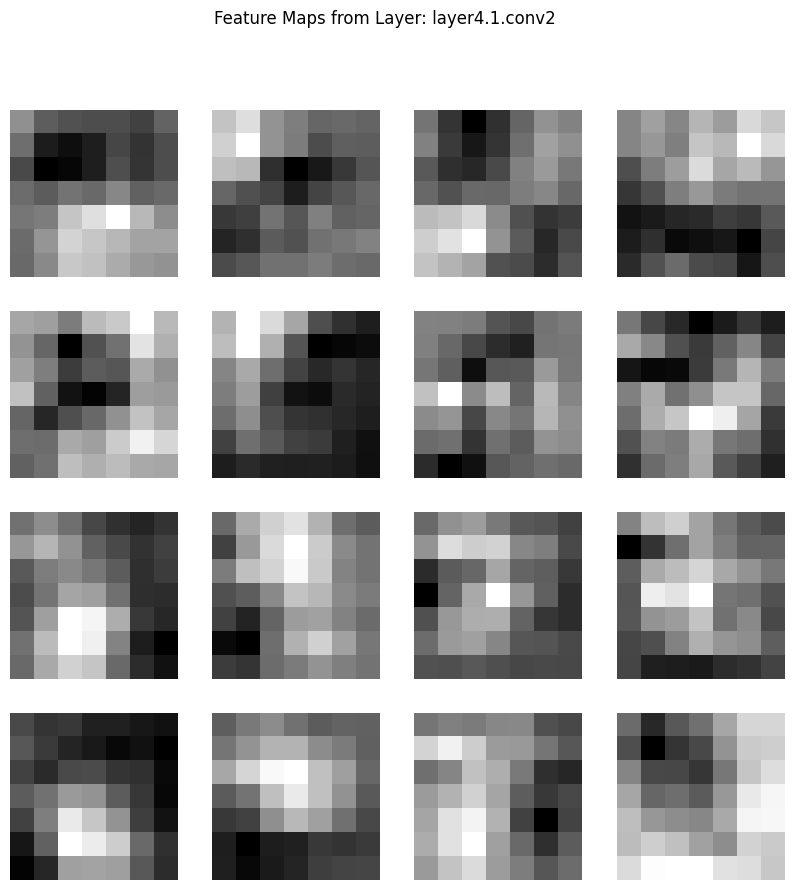

In [16]:
def visualize_feature_maps(model, image):
    activation = {}

    # Hook to store activations
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()  # Detach to prevent tracking gradients
        return hook

    # Register hooks for all convolutional layers in the model
    for name, layer in model.named_modules():
        if isinstance(layer, (nn.Conv2d, nn.ConvTranspose2d)):
            layer.register_forward_hook(get_activation(name))

    # Perform a forward pass with the provided image
    with torch.no_grad():  # Disable gradient computation
        _ = model(image)

    # Visualize the feature maps
    for name, features in activation.items():
        if isinstance(features, torch.Tensor):
            print(f"Feature maps for layer: {name}")
            feature_num = features.shape[1]

            # Plotting limits
            num_plots = min(feature_num, 16)  # Only plot up to 16 feature maps
            plt.figure(figsize=(10, 10))  # Set a figure size

            for i in range(num_plots):
                plt.subplot(4, 4, i + 1)
                plt.imshow(features[0, i, :, :].cpu().numpy(), cmap='gray')
                plt.axis('off')

            plt.suptitle(f"Feature Maps from Layer: {name}")  # Title for clarity
            plt.show()

# Prepare the input image
inp, _ = train_dataset.__getitem__(0)  # Get the first item from the dataset
inp = inp.unsqueeze(0)  # Add batch dimension (1, channels, height, width)

# Call the function to visualize feature maps
visualize_feature_maps(resnet.to(device), inp.to(device)) 